# Data Splitting

In this tutorial, we will learn how to split data into training and test sets, perform cross-validation and bootstrapping, and use customized splits in hyperparameter optimization and model assessment. 

Let's get started!

First we will create the dataset we will be working with.

In [1]:
import os

from IPython.display import display

from qsprpred.data import QSPRDataset
from qsprpred.data.descriptors.fingerprints import MorganFP

os.makedirs("../../tutorial_output/data", exist_ok=True)

dataset = QSPRDataset.fromTableFile(
    filename="../../tutorial_data/A2A_LIGANDS.tsv",
    store_dir="../../tutorial_output/data",
    name="SplittingTutorialDataset",
    target_props=[{"name": "pchembl_value_Mean", "task": "SINGLECLASS", "th": [6.5]}],
    random_state=42
)

display(dataset.getDF())

dataset.addDescriptors([MorganFP(radius=3, nBits=2048)])
dataset.getDescriptors().shape

,SMILES,pchembl_value_Mean,Year,QSPRID,pchembl_value_Mean_original
QSPRID,,,,,
SplittingTutorialDataset_0000,Cc1nn(-c2cc(NC(=O)CCN(C)C)nc(-c3ccc(C)o3)n2)c(...,True,2008.0,SplittingTutorialDataset_0000,8.68
SplittingTutorialDataset_0001,Nc1c(C(=O)Nc2ccc([N+](=O)[O-])cc2)sc2c1cc1CCCC...,False,2010.0,SplittingTutorialDataset_0001,4.82
SplittingTutorialDataset_0002,O=C(Nc1nc2ncccc2n2c(=O)n(-c3ccccc3)nc12)c1ccccc1,False,2009.0,SplittingTutorialDataset_0002,5.65
SplittingTutorialDataset_0003,CNC(=O)C12CC1C(n1cnc3c1nc(C#CCCCCC(=O)OC)nc3NC...,False,2009.0,SplittingTutorialDataset_0003,5.45
SplittingTutorialDataset_0004,CCCn1c(=O)c2c(nc3cc(OC)ccn32)n(CCCNC(=O)c2ccc(...,False,2019.0,SplittingTutorialDataset_0004,5.20
...,...,...,...,...,...
SplittingTutorialDataset_4077,CNc1ncc(C(=O)NCc2ccc(OC)cc2)c2nc(-c3ccco3)nn12,True,2018.0,SplittingTutorialDataset_4077,7.09
SplittingTutorialDataset_4078,Nc1nc(-c2ccco2)c2ncn(C(=O)NCCc3ccccc3)c2n1,True,2008.0,SplittingTutorialDataset_4078,8.22
SplittingTutorialDataset_4079,Nc1nc(Nc2ccc(F)cc2)nc(CSc2nnc(N)s2)n1,False,2010.0,SplittingTutorialDataset_4079,4.89


(4082, 2048)

You can see that this dataset has not been split into training and test sets yet.
All the data is in the training set.

In [2]:
def print_split(ds):
    train, test = ds.getFeatures()
    print(train.shape)
    print(test.shape)
    print(test.index)


print_split(dataset)

(4082, 2048)
(0, 2048)
Index([], dtype='object', name='QSPRID')


## Training and Test Split

We can use any scikit-learn splitter or an implementation  of `qsprpred.data.interfaces.DataSplit` to split the data set into training and test split:

In [3]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2,
                               random_state=dataset.randomState)
dataset.split(split)
print_split(dataset)

(3265, 2048)
(817, 2048)
Index(['SplittingTutorialDataset_1141', 'SplittingTutorialDataset_2680',
       'SplittingTutorialDataset_2238', 'SplittingTutorialDataset_2607',
       'SplittingTutorialDataset_4070', 'SplittingTutorialDataset_3630',
       'SplittingTutorialDataset_0759', 'SplittingTutorialDataset_0431',
       'SplittingTutorialDataset_3663', 'SplittingTutorialDataset_3301',
       ...
       'SplittingTutorialDataset_1057', 'SplittingTutorialDataset_3547',
       'SplittingTutorialDataset_0424', 'SplittingTutorialDataset_0026',
       'SplittingTutorialDataset_0476', 'SplittingTutorialDataset_3709',
       'SplittingTutorialDataset_1470', 'SplittingTutorialDataset_2314',
       'SplittingTutorialDataset_0242', 'SplittingTutorialDataset_2999'],
      dtype='object', name='QSPRID', length=817)


Or we can use one of the build-in splits:

In [4]:
from qsprpred.data import RandomSplit

split = RandomSplit(test_fraction=0.2)
dataset.split(split)
print_split(dataset)

(3265, 2048)
(817, 2048)
Index(['SplittingTutorialDataset_0599', 'SplittingTutorialDataset_0752',
       'SplittingTutorialDataset_1954', 'SplittingTutorialDataset_2928',
       'SplittingTutorialDataset_2512', 'SplittingTutorialDataset_2289',
       'SplittingTutorialDataset_0682', 'SplittingTutorialDataset_0325',
       'SplittingTutorialDataset_0166', 'SplittingTutorialDataset_3389',
       ...
       'SplittingTutorialDataset_2750', 'SplittingTutorialDataset_1233',
       'SplittingTutorialDataset_2915', 'SplittingTutorialDataset_1916',
       'SplittingTutorialDataset_2411', 'SplittingTutorialDataset_2619',
       'SplittingTutorialDataset_1419', 'SplittingTutorialDataset_0067',
       'SplittingTutorialDataset_1844', 'SplittingTutorialDataset_0937'],
      dtype='object', name='QSPRID', length=817)


For the scikit-learn splits we need to specify the random state explicitly to ensure reproducibility. However, for the build-in splits the random state is inherited from the dataset if not specified explicitly.

In these examples we directly used the `split` method of the `QSPRDataSet` class, however, the splitting can also be done as one of the steps in the `prepareDataset` method (see the [data preparation tutorial](data_preparation.ipynb) for more information).

You can find an overview of all the splits in the [documentation](https://cddleiden.github.io/QSPRpred/docs/api/qsprpred.data.utils.html#module-qsprpred.data.utils.datasplitters). 

## Cross-validation and Bootstrapping

Splits also can facilitate cross-validation and bootstrapping.
Bootstrapping here meaning repeatedly random splitting the data set into training and test sets. This can be useful to estimate the uncertainty of the model performance.

For example, we can use the `StratifiedShuffleSplit` to perform bootstrapping of the data set by just varying the number of splits:

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit


def print_cv_split(fold, X_train, X_test, y_train, y_test, train_index, test_index):
    print(f"Fold {fold + 1}")
    print(f"Train: {X_train.shape}")
    print(f"Test: {X_test.shape}")
    print(f"Train response: {y_train.shape}")
    print(f"Test response: {y_test.shape}")
    print(X_test.index)
    print("####################")


split = StratifiedShuffleSplit(n_splits=10, test_size=0.2,
                               random_state=dataset.randomState)
for fold, (X_train, X_test, y_train, y_test, train_index, test_index) in enumerate(
        dataset.iterFolds(split)):
    print_cv_split(fold, X_train, X_test, y_train, y_test, train_index, test_index)

Fold 1
Train: (2612, 2048)
Test: (653, 2048)
Train response: (2612, 1)
Test response: (653, 1)
Index(['SplittingTutorialDataset_4047', 'SplittingTutorialDataset_0466',
       'SplittingTutorialDataset_1987', 'SplittingTutorialDataset_3851',
       'SplittingTutorialDataset_0110', 'SplittingTutorialDataset_2271',
       'SplittingTutorialDataset_4061', 'SplittingTutorialDataset_3114',
       'SplittingTutorialDataset_1804', 'SplittingTutorialDataset_0396',
       ...
       'SplittingTutorialDataset_1497', 'SplittingTutorialDataset_2860',
       'SplittingTutorialDataset_3140', 'SplittingTutorialDataset_2835',
       'SplittingTutorialDataset_0848', 'SplittingTutorialDataset_1998',
       'SplittingTutorialDataset_1645', 'SplittingTutorialDataset_3185',
       'SplittingTutorialDataset_0397', 'SplittingTutorialDataset_2471'],
      dtype='object', name='QSPRID', length=653)
####################
Fold 2
Train: (2612, 2048)
Test: (653, 2048)
Train response: (2612, 1)
Test response: (653, 1

Notice that we are now creating bootstrapping splits over the training data since our data set is already split from before. However, we can also enforce the split to be over the entire data set by setting the `concat` parameter of `iterFolds` to `True`:

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=10, test_size=0.2,
                               random_state=dataset.randomState)
for fold, (X_train, X_test, y_train, y_test, train_index, test_index) in enumerate(
        dataset.iterFolds(split, concat=True)):
    print_cv_split(fold, X_train, X_test, y_train, y_test, train_index, test_index)

Fold 1
Train: (3265, 2048)
Test: (817, 2048)
Train response: (3265, 1)
Test response: (817, 1)
Index(['SplittingTutorialDataset_1141', 'SplittingTutorialDataset_2680',
       'SplittingTutorialDataset_2238', 'SplittingTutorialDataset_2607',
       'SplittingTutorialDataset_4070', 'SplittingTutorialDataset_3630',
       'SplittingTutorialDataset_0759', 'SplittingTutorialDataset_0431',
       'SplittingTutorialDataset_3663', 'SplittingTutorialDataset_3301',
       ...
       'SplittingTutorialDataset_1057', 'SplittingTutorialDataset_3547',
       'SplittingTutorialDataset_0424', 'SplittingTutorialDataset_0026',
       'SplittingTutorialDataset_0476', 'SplittingTutorialDataset_3709',
       'SplittingTutorialDataset_1470', 'SplittingTutorialDataset_2314',
       'SplittingTutorialDataset_0242', 'SplittingTutorialDataset_2999'],
      dtype='object', name='QSPRID', length=817)
####################
Fold 2
Train: (3265, 2048)
Test: (817, 2048)
Train response: (3265, 1)
Test response: (817, 1

The same procedure can also be used for traditional cross-validation:

In [7]:
from sklearn.model_selection import StratifiedKFold

split = StratifiedKFold(n_splits=10, shuffle=True, random_state=dataset.randomState)
for fold, (X_train, X_test, y_train, y_test, train_index, test_index) in enumerate(
        dataset.iterFolds(split)):
    print_cv_split(fold, X_train, X_test, y_train, y_test, train_index, test_index)

Fold 1
Train: (2938, 2048)
Test: (327, 2048)
Train response: (2938, 1)
Test response: (327, 1)
Index(['SplittingTutorialDataset_2453', 'SplittingTutorialDataset_3382',
       'SplittingTutorialDataset_3509', 'SplittingTutorialDataset_2023',
       'SplittingTutorialDataset_3330', 'SplittingTutorialDataset_2534',
       'SplittingTutorialDataset_3053', 'SplittingTutorialDataset_3472',
       'SplittingTutorialDataset_0964', 'SplittingTutorialDataset_1621',
       ...
       'SplittingTutorialDataset_2343', 'SplittingTutorialDataset_1016',
       'SplittingTutorialDataset_0815', 'SplittingTutorialDataset_2317',
       'SplittingTutorialDataset_0775', 'SplittingTutorialDataset_1390',
       'SplittingTutorialDataset_3638', 'SplittingTutorialDataset_3385',
       'SplittingTutorialDataset_2433', 'SplittingTutorialDataset_0130'],
      dtype='object', name='QSPRID', length=327)
####################
Fold 2
Train: (2938, 2048)
Test: (327, 2048)
Train response: (2938, 1)
Test response: (327, 1

And naturally we can also use the built-in `DataSplit` implementations. For example, in the following example we use the `ScaffoldSplit` to generate cross-validation splits based on the scaffold of the molecules:

In [8]:
from qsprpred.data.chem.scaffolds import Murcko
from qsprpred.data import ScaffoldSplit

split = ScaffoldSplit(n_folds=10, scaffold=Murcko())
for fold, (X_train, X_test, y_train, y_test, train_index, test_index) in enumerate(
        dataset.iterFolds(split)):
    print_cv_split(fold, X_train, X_test, y_train, y_test, train_index, test_index)

Fold 1
Train: (2942, 2048)
Test: (323, 2048)
Train response: (2942, 1)
Test response: (323, 1)
Index(['SplittingTutorialDataset_0221', 'SplittingTutorialDataset_0088',
       'SplittingTutorialDataset_2876', 'SplittingTutorialDataset_3330',
       'SplittingTutorialDataset_0283', 'SplittingTutorialDataset_2297',
       'SplittingTutorialDataset_1871', 'SplittingTutorialDataset_1891',
       'SplittingTutorialDataset_1940', 'SplittingTutorialDataset_2650',
       ...
       'SplittingTutorialDataset_2454', 'SplittingTutorialDataset_1495',
       'SplittingTutorialDataset_3796', 'SplittingTutorialDataset_3342',
       'SplittingTutorialDataset_2449', 'SplittingTutorialDataset_1500',
       'SplittingTutorialDataset_1685', 'SplittingTutorialDataset_1130',
       'SplittingTutorialDataset_1294', 'SplittingTutorialDataset_0860'],
      dtype='object', name='QSPRID', length=323)
####################
Fold 2
Train: (2941, 2048)
Test: (324, 2048)
Train response: (2941, 1)
Test response: (324, 1

We can also use the `BootstrapSplit` to automatically make bootstrapping splits from splitters that do not support the `n_splits` or `n_folds` parameters:

In [9]:
from qsprpred.data import BootstrapSplit

split = BootstrapSplit(split=RandomSplit(0.2), n_bootstraps=10)
for fold, (X_train, X_test, y_train, y_test, train_index, test_index) in enumerate(
        dataset.iterFolds(split, concat=True)):
    print_cv_split(fold, X_train, X_test, y_train, y_test, train_index, test_index)

Fold 1
Train: (3265, 2048)
Test: (817, 2048)
Train response: (3265, 1)
Test response: (817, 1)
Index(['SplittingTutorialDataset_0599', 'SplittingTutorialDataset_0752',
       'SplittingTutorialDataset_1954', 'SplittingTutorialDataset_2928',
       'SplittingTutorialDataset_2512', 'SplittingTutorialDataset_2289',
       'SplittingTutorialDataset_0682', 'SplittingTutorialDataset_0325',
       'SplittingTutorialDataset_0166', 'SplittingTutorialDataset_3389',
       ...
       'SplittingTutorialDataset_2750', 'SplittingTutorialDataset_1233',
       'SplittingTutorialDataset_2915', 'SplittingTutorialDataset_1916',
       'SplittingTutorialDataset_2411', 'SplittingTutorialDataset_2619',
       'SplittingTutorialDataset_1419', 'SplittingTutorialDataset_0067',
       'SplittingTutorialDataset_1844', 'SplittingTutorialDataset_0937'],
      dtype='object', name='QSPRID', length=817)
####################
Fold 2
Train: (3265, 2048)
Test: (817, 2048)
Train response: (3265, 1)
Test response: (817, 1

## Using Customized Splits in Hyperparameter Optimization and Model Assessment

We can also directly supply these splitters to the `HyperparameterOptimizer` and `ModelAssessor` classes to perform hyperparameter optimization and model assessment. To learn more about hyperparameter optimization and model assessment, please refer to the [hyperparameter optimization](../../advanced/modelling/hyperparameter_optimization.ipynb) and [model assessment](https://cddleiden.github.io/QSPRpred/tutorials/model_assessment.html) tutorials.

In [14]:
from qsprpred.models import SklearnModel
from sklearn.ensemble import ExtraTreesClassifier
from qsprpred.models.hyperparam_optimization import OptunaOptimization
from qsprpred.models.assessment_methods import CrossValAssessor

os.makedirs("../../tutorial_output/models", exist_ok=True)

model = SklearnModel(
    base_dir="../../tutorial_output/models/",
    alg=ExtraTreesClassifier,
    name="SplittingTutorialModel",
    random_state=dataset.randomState
)
search_space_bs = {"n_estimators": ["int", 10, 100, 250]}
optimizer = OptunaOptimization(
    param_grid=search_space_bs,
    n_trials=3,  # for demonstration purposes we only use three trials
    model_assessor=CrossValAssessor(
        scoring="roc_auc",
        split=BootstrapSplit(split=RandomSplit(0.2), n_bootstraps=5)
    )
)
optimizer.optimize(model, dataset)

[I 2024-02-06 15:05:54,288] A new study created in memory with name: no-name-172bfa8a-787b-4d57-8703-53e160382162
[I 2024-02-06 15:05:57,063] Trial 0 finished with value: 0.8980087387942112 and parameters: {'n_estimators': 44}. Best is trial 0 with value: 0.8980087387942112.
[I 2024-02-06 15:06:03,080] Trial 1 finished with value: 0.8999885037138509 and parameters: {'n_estimators': 96}. Best is trial 1 with value: 0.8999885037138509.
[I 2024-02-06 15:06:07,729] Trial 2 finished with value: 0.9014254870758489 and parameters: {'n_estimators': 76}. Best is trial 2 with value: 0.9014254870758489.


{'n_estimators': 76}

In [21]:
# run bootstrapping ten times with the optimized model
CrossValAssessor(
    scoring="roc_auc",
    split=BootstrapSplit(split=RandomSplit(0.2), n_bootstraps=10)
)(model, dataset)

array([0.89204467, 0.89182185, 0.90166254, 0.91214718, 0.9094512 ,
       0.88226919, 0.89837523, 0.8751793 , 0.86626687, 0.87910458])

In [16]:
# evaluate on the test set as well
from qsprpred.models.assessment_methods import TestSetAssessor

TestSetAssessor(scoring="roc_auc")(model, dataset)

array([0.87887524])

In [17]:
_ = model.save()

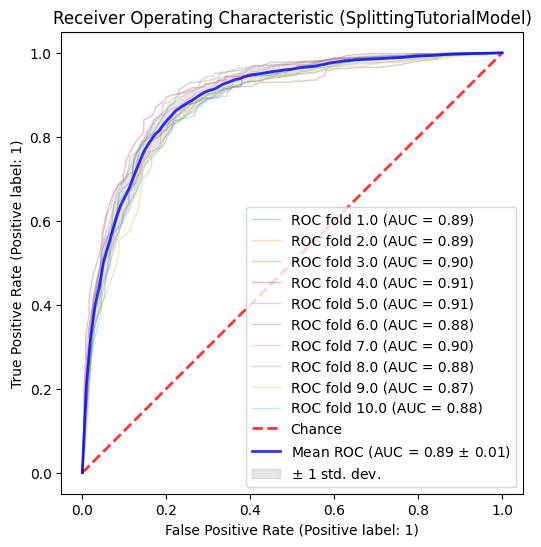

[<Figure size 600x600 with 1 Axes>]

<Figure size 640x480 with 0 Axes>

In [18]:
# plot the results for bootstrapping
from qsprpred.plotting.classification import ROCPlot

plot = ROCPlot([model])
plot.make(save=True, show=True, property_name=model.targetProperties[0].name,
          validation="cv")

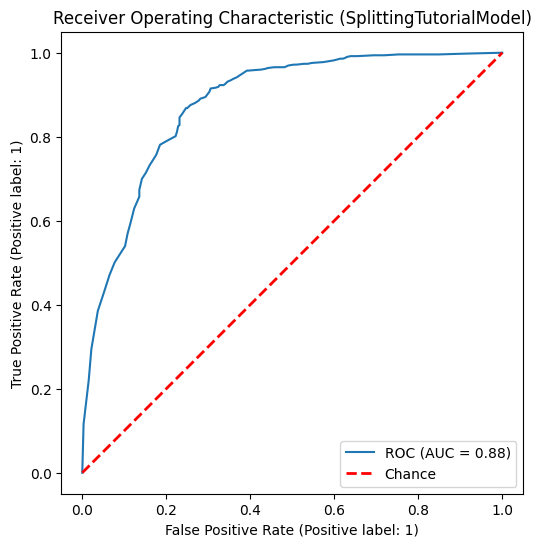

[<Figure size 600x600 with 1 Axes>]

<Figure size 640x480 with 0 Axes>

In [19]:
# plot test set results
plot.make(save=True, show=True, property_name=model.targetProperties[0].name,
          validation="ind")

We can now also easily run a different analysis if desired. This time we use the `ScaffoldSplit` to perform cross-validation:

In [20]:
CrossValAssessor(
    scoring="roc_auc",
    split=ScaffoldSplit(n_folds=10, scaffold=Murcko())
)(model, dataset)

array([0.87648054, 0.81278392, 0.88967081, 0.90823413, 0.88266998,
       0.85626983, 0.85669679, 0.89389863, 0.8938379 , 0.75603255])

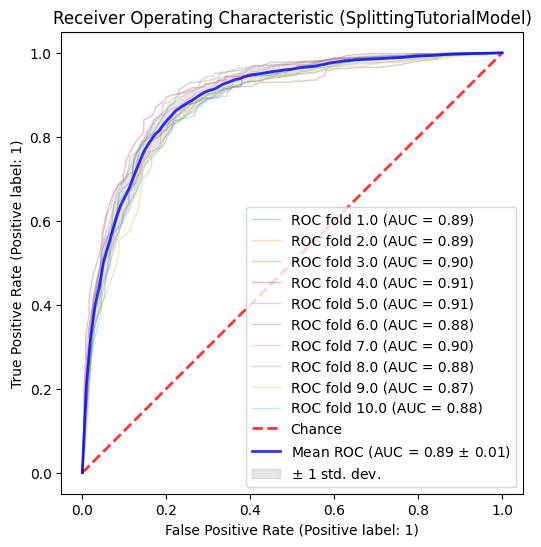

[<Figure size 600x600 with 1 Axes>]

<Figure size 640x480 with 0 Axes>

In [22]:
plot.make(save=True, show=True, property_name=model.targetProperties[0].name,
          validation="cv")

Evaluating different time splits can also be convenient sometimes:

<Axes: >

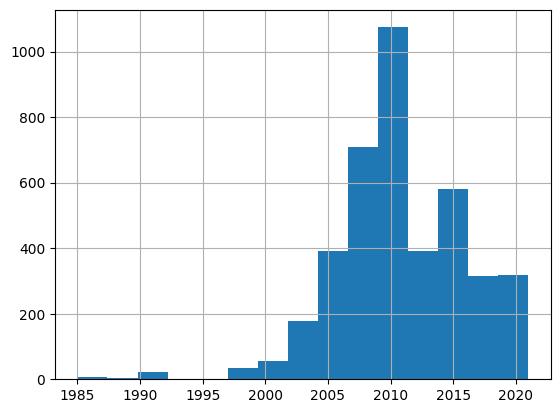

In [23]:
dataset.getProperty("Year").hist(bins=15)

In [24]:
from qsprpred.data import TemporalSplit

CrossValAssessor(
    scoring="roc_auc",
    split=TemporalSplit(timesplit=[2000, 2010, 2020], timeprop="Year")
)(model, dataset)

array([0.66177235, 0.72243217, 0.94897959])

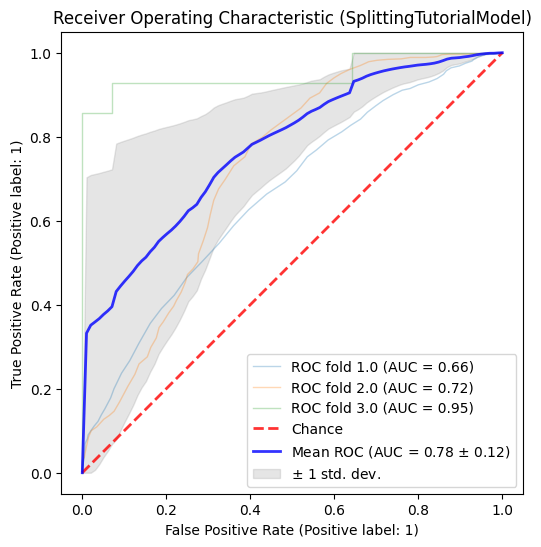

[<Figure size 600x600 with 1 Axes>]

<Figure size 640x480 with 0 Axes>

In [25]:
plot.make(save=True, show=True, property_name=model.targetProperties[0].name,
          validation="cv")

These splits are not saved to the dataset, but the assessments and optimizations can be reproduced by setting the random state to the same value. You can also explicitly save the splits to by adding a monitor to the `ModelAssessor` or `HyperparameterOptimizer`, see the [monitoring tutorial](../../advanced/modelling/monitoring.ipynb) for more information.

## Trying multiple splits with the same dataset

If you want to train your model on multiple splits of the same dataset, you can prepare the dataset once until the point of splitting. Then you can save the dataset and re-load it to split differently. This way you can save time on preparing the dataset multiple times. The datasplit will be overwritten if you run `split` again.
The dataset also has a reset method to reset the dataset to the state before the preparation steps were applied. Therefore, you can also use the `reset` method to reset the dataset to the state before splitting and then split again.


In [26]:
from sklearn.model_selection import StratifiedShuffleSplit

# check split is empty
dataset.reset()
print_split(dataset)

# split the dataset and print the split
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2,
                               random_state=dataset.randomState)
dataset.split(split)
print_split(dataset)

# reset the dataset and print the split again, it should be empty
dataset.reset()
print_split(dataset)

(4082, 2048)
(0, 2048)
Index([], dtype='object', name='QSPRID')
(3265, 2048)
(817, 2048)
Index(['SplittingTutorialDataset_1141', 'SplittingTutorialDataset_2680',
       'SplittingTutorialDataset_2238', 'SplittingTutorialDataset_2607',
       'SplittingTutorialDataset_4070', 'SplittingTutorialDataset_3630',
       'SplittingTutorialDataset_0759', 'SplittingTutorialDataset_0431',
       'SplittingTutorialDataset_3663', 'SplittingTutorialDataset_3301',
       ...
       'SplittingTutorialDataset_1057', 'SplittingTutorialDataset_3547',
       'SplittingTutorialDataset_0424', 'SplittingTutorialDataset_0026',
       'SplittingTutorialDataset_0476', 'SplittingTutorialDataset_3709',
       'SplittingTutorialDataset_1470', 'SplittingTutorialDataset_2314',
       'SplittingTutorialDataset_0242', 'SplittingTutorialDataset_2999'],
      dtype='object', name='QSPRID', length=817)
(4082, 2048)
(0, 2048)
Index([], dtype='object', name='QSPRID')
